In [1]:
import numpy as np
import pickle
import torch

# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9.5, 6]

In [2]:
class Vocabulary(object):
    def __init__(self, pad_token='<pad>', unk_token='<unk>', eos_token='<eos>'):
        self.token2idx = {}
        self.idx2token = []
        self.pad_token = pad_token
        self.unk_token = unk_token
        self.eos_token = eos_token
        if pad_token is not None:
            self.pad_index = self.add_token(pad_token)
        if unk_token is not None:
            self.unk_index = self.add_token(unk_token)
        if eos_token is not None:
            self.eos_index = self.add_token(eos_token)

    def add_token(self, token):
        if token not in self.token2idx:
            self.idx2token.append(token)
            self.token2idx[token] = len(self.idx2token) - 1
        return self.token2idx[token]

    def get_index(self, token):
        if isinstance(token, str):
            return self.token2idx.get(token, self.unk_index)
        else:
            return [self.token2idx.get(t, self.unk_index) for t in token]

    def get_token(self, index):
        return self.idx2token[index]

    def __len__(self):
        return len(self.idx2token)

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.__dict__, f)

    def load(self, filename):
        with open(filename, 'rb') as f:
            self.__dict__.update(pickle.load(f))

We will use the vocabulary computed by the Text Preprocessing notebook (text-preprocessing), and the word vectors computed by the CBOW Training notebook (cbow-vectors)

In [3]:
DATASET_VERSION = 'ca-100'
CBOW_VOCABULARY_ROOT = f'../input/text-preprocessing/data/{DATASET_VERSION}'
CBOW_VECTORS_ROOT = f'../input/cbow-training/data/{DATASET_VERSION}'

In [4]:
dict = f'{CBOW_VOCABULARY_ROOT}/ca.wiki.train.tokens.nopunct.dic'
counter = pickle.load(open(dict, 'rb'))
words, values = zip(*counter.most_common(5000))
print('Most frequent Catalan words')
print(words[:10])
print(values[:10])

Most frequent Catalan words
('de', 'la', 'i', 'a', 'el', 'd', 'l', 'que', 'en', 'va')
(5029788, 2771563, 2495802, 2130330, 1704858, 1362665, 1322822, 1293716, 1266356, 1191615)


In [5]:
from scipy.stats import entropy
h = entropy(values)
print(f'Word entropy: {h:5.2f}, Perplexity: {np.exp(h):5.0f}')
print(f'Probability of the most frequent word: {values[0]/sum(values):2.3f}')

Word entropy:  6.22, Perplexity:   505
Probability of the most frequent word: 0.076


**Zipf's law of words**. Zipf's law was originally formulated in terms of quantitative linguistics, stating that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table.

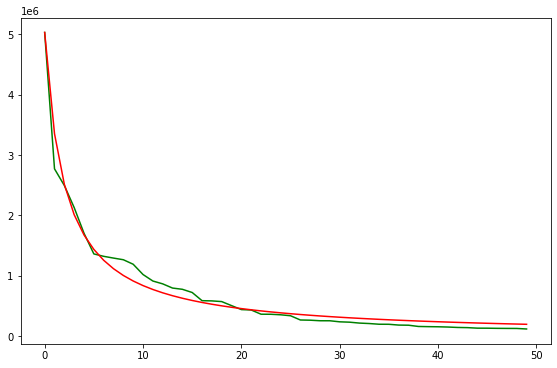

In [6]:
_ = plt.plot(values[:50], 'g', 2*values[0]/np.arange(2,52), 'r')

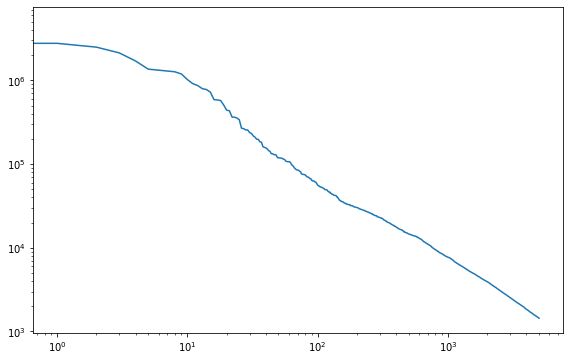

In [7]:
_ = plt.loglog(values)
plt.show()

**Benford's law**, also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data.

Counter({1: 1705, 2: 1332, 3: 673, 4: 450, 5: 283, 6: 192, 7: 157, 8: 126, 9: 82})


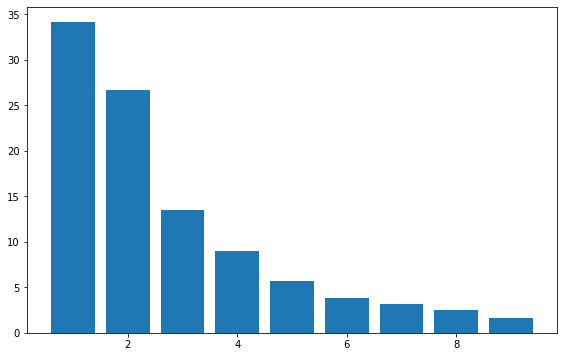

In [8]:
from collections import Counter
benford = Counter(int(str(item[1])[0]) for item in counter.most_common(5000))
print(benford)
percentage = np.array(list(benford.values()), dtype=float)
percentage /= percentage.sum()
_ = plt.bar(list(benford.keys()), percentage*100)

In [9]:
modelname = f'{CBOW_VECTORS_ROOT}/{DATASET_VERSION}.pt'
state_dict = torch.load(modelname, map_location=torch.device('cpu'))
state_dict.keys()
input_word_vectors = state_dict['emb.weight'].numpy()
input_word_vectors.shape
output_word_vectors = state_dict['lin.weight'].numpy()
output_word_vectors.shape
token_vocab = Vocabulary()
token_vocab.load(f'{CBOW_VOCABULARY_ROOT}/ca.wiki.vocab')
token_vocab.get_index('català')
input_word_vectors[319]

array([-1.5513002 , -0.47219712, -0.65346843,  1.2714294 ,  0.09819444,
       -0.68338555,  0.37778148,  0.2670131 , -0.01618124, -0.6729748 ,
        0.5460163 ,  0.51689065,  0.06045762, -0.6882081 ,  0.08059067,
        0.70080084,  1.752819  ,  0.22639294,  0.02374895, -0.5478931 ,
        0.42967817,  0.00773042,  0.568692  ,  0.66171175, -0.5265295 ,
       -0.10381954, -0.90822613,  0.69897836, -1.3488342 , -0.6226466 ,
       -1.145444  ,  0.61179346,  0.8475806 ,  0.16420804,  0.66109604,
       -0.21857144, -1.1894137 ,  0.07739363,  0.41590232,  1.6126089 ,
       -0.9307562 , -0.23834671, -0.9167377 ,  0.92611474, -0.9308362 ,
       -0.09172549, -0.14428475, -1.1423957 , -0.10806679, -0.5481123 ,
       -0.5561421 ,  0.75277025,  0.26282218,  0.69359523,  1.2634131 ,
        0.88597095, -0.7218979 ,  0.5708405 , -0.34090278,  0.03431087,
       -0.32920894, -0.04161268,  0.62266546, -0.52281386, -0.39479464,
        0.04756225, -0.90671605,  0.44264042,  0.168572  , -0.17

In [10]:
state_dict.keys()

odict_keys(['emb.weight', 'lin.weight'])

In [11]:
input_word_vectors = state_dict['emb.weight'].numpy()
input_word_vectors.shape

(100002, 100)

In [12]:
output_word_vectors = state_dict['lin.weight'].numpy()
output_word_vectors.shape
print(output_word_vectors[319])

[ 0.31125057 -0.38540262 -0.09431015  0.10190284 -0.42384616  0.3777685
 -0.12374342  0.19683373 -0.01501002  0.13209659 -0.37719315 -0.21325232
 -0.46671718 -0.31131572  0.3910611   0.37811333  0.29485452 -0.20152941
  0.5265534   0.28425884  0.5797447  -0.5476101   0.28899306 -0.24213009
 -0.36060718 -0.30672568 -0.56671864 -0.02238049  0.10881505  0.30325216
  0.39886615  0.3232506  -0.20700741  0.40597907 -0.58372515  0.02107006
  0.10240543  0.4342261  -0.73093295 -0.24593626  0.14163786 -0.2870561
 -0.26822013  0.5083263  -0.47040012  0.04551022  0.41269633 -0.10234208
  0.05755818 -0.37176102 -0.41466475 -0.5479259   0.38277027 -0.16331172
 -0.19143964  0.2813985   0.64246356  0.12377869  0.11338012  0.37796527
 -0.04663288 -0.43088645 -0.4677246   0.5254441  -0.27615827 -0.23878849
 -0.10526001 -0.18355003  0.2021592   0.6287626   0.7641732  -0.00828365
 -0.30999205 -0.19649465 -0.23186737 -0.34329963 -0.01143708  0.5134758
  0.15633786 -0.2642048   0.09119914 -0.66800606 -0.16

In [13]:
token_vocab = Vocabulary()
token_vocab.load(f'{CBOW_VOCABULARY_ROOT}/ca.wiki.vocab')
token_vocab.get_index('artista')

1024

In [14]:
import numpy as np
from scipy.spatial.distance import cdist

class WordVectors:
    def _init_(self, vectors, vocabulary):
        self.vectors = vectors
        self.vocabulary = vocabulary
        self.vector_norms = np.linalg.norm(self.vectors, axis=1)
    
    def most_similar(self, word, topn=10):
        # Get the index and vector of the input word 
        word_index = self.vocabulary.get_index(word)
        word_vector = self.vectors[word_index]
        
        # Calculate the cosine similarity between the input word vector and all other vectors
        cosine_similarities = np.dot(self.vectors, word_vector) / (self.vector_norms * np.linalg.norm(word_vector))
        
        # Sort in descending order
        most_similar_indices = np.argsort(cosine_similarities)[::-1]
        
        # Get the top n most similar words 
        topn_similar_words=[]
        for i in most_similar_indices:
            if i != word_index and i != self.vocabulary.get_index('<pad>'):
                topn_similar_words.append((self.vocabulary.get_token(i), cosine_similarities[i]))
        return topn_similar_words[:topn]
    
    def analogy(self, x1, x2, y1, topn=5, keep_all=False):
        # Get the indices and vectors of the input words 
        x1_index = self.vocabulary.get_index(x1)
        x2_index = self.vocabulary.get_index(x2)
        y1_index = self.vocabulary.get_index(y1)
        
        x1_vector = self.vectors[x1_index]
        x2_vector = self.vectors[x2_index]
        y1_vector = self.vectors[y1_index]
        
        # Calculate the vector for the analogy following the formula
        analogy_vector = y1_vector + (x2_vector - x1_vector)
        
        # Calculate the cosine similarity between the analogy vector and all other vectors
        cosine_similarities = np.dot(self.vectors, analogy_vector) / (self.vector_norms * np.linalg.norm(analogy_vector))
        
        # Sort in descending order
        most_similar_indices = np.argsort(cosine_similarities)[::-1]
        
        if keep_all:
            # Get all the similar words 
            similar_words = [(self.vocabulary.get_token(i), cosine_similarities[i]) for i in most_similar_indices if i not in (x1_index, x2_index, y1_index)]
        else:
            # Get the topn most similar words
            similar_words = [(self.vocabulary.get_token(i), cosine_similarities[i]) for i in most_similar_indices if i not in (x1_index, x2_index, y1_index)][:topn]
        
        return similar_words

In [15]:
model1 = WordVectors(input_word_vectors, token_vocab)
model2 = WordVectors(output_word_vectors, token_vocab)

In [16]:
model1.most_similar('ella')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


[('<pad>', nan),
 ('ell', 0.791588),
 ('algú', 0.5908369),
 ('allà', 0.54332805),
 ('Jace', 0.5361504),
 ('Ella', 0.5354649),
 ('Ruffy', 0.5275484),
 ('Eliza', 0.5185566),
 ('ells', 0.5161088),
 ('feliçment', 0.5107707)]

In [17]:
model2.analogy('futbol', 'futbolista', 'art')

[('escultor', 0.89611083),
 ('investigador', 0.8947141),
 ('novel·lista', 0.89356583),
 ('empresari', 0.892698),
 ('esportista', 0.8922875)]

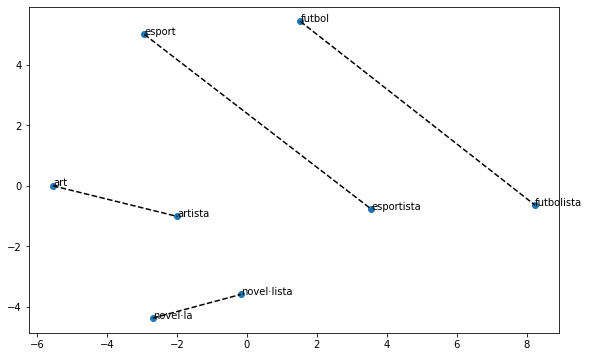

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#input_word_vectors usa los embeddings, que es lo que se suele usar normalmente
""" Input_word_vectors i output_word_vectors son dos models diferents.
Hem de veure que funcionen igual de bé"""
word_pairs=[['futbol','futbolista'],['art','artista'],['novel·la','novel·lista'], ['esport', 'esportista']]
embeddings=[]
for pair in word_pairs:
    embeddings.append(input_word_vectors[token_vocab.get_index(pair[0])])
    embeddings.append(input_word_vectors[token_vocab.get_index(pair[1])])
    
# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# Plot the PCA embeddings and add lines joining the pairs
fig, ax = plt.subplots()
ax.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1])
for i in range(0, len(pca_embeddings), 2):
    ax.plot([pca_embeddings[i, 0], pca_embeddings[i+1, 0]], [pca_embeddings[i, 1], pca_embeddings[i+1, 1]], 'k--')
    ax.annotate(word_pairs[i//2][0], (pca_embeddings[i, 0], pca_embeddings[i, 1]))
    ax.annotate(word_pairs[i//2][1], (pca_embeddings[i+1, 0], pca_embeddings[i+1, 1]))
plt.show()

#tsne = TSNE(n_components=2, method='barnes_hut', n_jobs=-1, perplexity=30, verbose=2, n_iter=2500, learning_rate='auto')
#embeddings_tsne = tsne.fit_transform(model1.vectors)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

word_list=['francès', 'italià', 'espanyol', 'xinès', 'verd', 'blau', 'vermell', 'groc', 'gos', 'gat', 'ocell', 'elefant']
color_list=['red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green']
embeddings=[]
for word in word_list:
    embeddings.append(input_word_vectors[token_vocab.get_index(word)])
    
# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)

# Plot the PCA embeddings and add lines joining the pairs
fig, ax = plt.subplots()
for i, color in enumerate(color_list):
    ax.scatter(pca_embeddings[i, 0], pca_embeddings[i, 1], color=color)
    ax.annotate(word_list[i], (pca_embeddings[i, 0], pca_embeddings[i, 1]))
plt.show()